In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Milan  = pd.read_csv('../ValoresAtipicosMilan.csv')

In [3]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Milan['review_scores_checkin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: review_scores_checkin
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['review_scores_checkin'].max()
Min = Milan['review_scores_checkin'].min()
Limites = [Min, Max]
Limites

[3.7, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1.2999999999999998

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.08373844765168464

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (3.7, 5, 16)
intervalos

array([3.7       , 3.78666667, 3.87333333, 3.96      , 4.04666667,
       4.13333333, 4.22      , 4.30666667, 4.39333333, 4.48      ,
       4.56666667, 4.65333333, 4.74      , 4.82666667, 4.91333333,
       5.        ])

In [10]:
# Creamos las categorías
categorias = [
    "Muy malo",
    "Malo",
    "Algo malo",
    "Regular",
    "Aceptable",
    "Suficiente",
    "Bueno",
    "Muy bueno",
    "Excelente",
    "Impecable",
    "Perfecto",
    "Extraordinario",
    "Eficiente",
    "Sin complicaciones",
    "Excepcional"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Milan['review_scores_checkin'] = pd.cut ( x = Milan ['review_scores_checkin'], bins = intervalos, labels = categorias )
Milan['review_scores_checkin']

0               Excepcional
1                  Perfecto
2               Excepcional
3        Sin complicaciones
4        Sin complicaciones
                ...        
23700    Sin complicaciones
23701    Sin complicaciones
23702    Sin complicaciones
23703    Sin complicaciones
23704    Sin complicaciones
Name: review_scores_checkin, Length: 23705, dtype: category
Categories (15, object): ['Muy malo' < 'Malo' < 'Algo malo' < 'Regular' ... 'Extraordinario' < 'Eficiente' < 'Sin complicaciones' < 'Excepcional']

In [12]:
table1 = freq_tbl(Milan['review_scores_checkin'])
table1

,review_scores_checkin,frequency,percentage,cumulative_perc
0,Excepcional,9308,0.392660,0.392676
1,Sin complicaciones,7277,0.306982,0.699671
2,Eficiente,2471,0.104240,0.803915
3,Extraordinario,1402,0.059144,0.863061
4,Perfecto,770,0.032483,0.895545
5,Impecable,677,0.028559,0.924106
6,Regular,448,0.018899,0.943005
7,Excelente,370,0.015609,0.958615
8,Muy bueno,338,0.014259,0.972874
9,Suficiente,211,0.008901,0.981775


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_checkin,frequency
0,Excepcional,9308
1,Sin complicaciones,7277
2,Eficiente,2471
3,Extraordinario,1402
4,Perfecto,770
5,Impecable,677
6,Regular,448
7,Excelente,370
8,Muy bueno,338
9,Suficiente,211


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_checkin')
Filtro_index

,frequency
review_scores_checkin,
Excepcional,9308
Sin complicaciones,7277
Eficiente,2471
Extraordinario,1402
Perfecto,770
Impecable,677
Regular,448
Excelente,370
Muy bueno,338


Text(0, 0.5, 'Frecuencia')

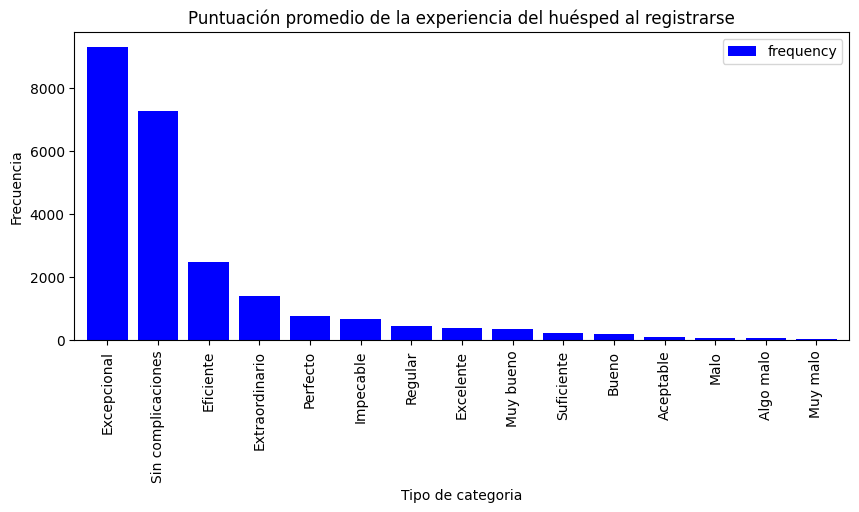

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de la experiencia del huésped al registrarse')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')